## Firing Rate Model

Write a homogenous Poisson process firing rate model to simulate three contrast sensitive sensory neurons. The firing rate from the input stimuli should follow the function 
, where the contrast intensity is defined via Michelson contrast and ranges from [0 1].
Each trial should last for 300 ms.
The contrast intensity of each trial will eventually be determined by the needs of the psychometric curve, but initial testing can be done without it.
Calculating the interspike interval will be more computationally efficient than a full moment-to-moment simulation, but potentially more complicated to code. You may make the choice here.

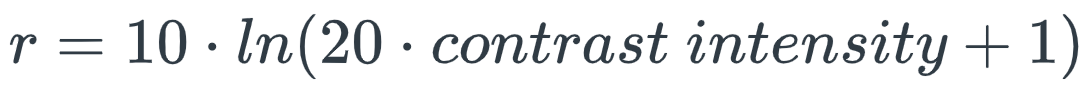

#### Group Notes

Input: Psychophysical curve, list of contrast intensity vs. time, (1x8)
Output: 3 x 300ms spike trains where contrast intensity is determined by the needs of the psychometric curve.

Outputs of this model should be 3 spike trains as well as their firing frequencies. In particular, the condition to tune the next part of the model is: the median intensity (.5) contrast should yield 20-50 Hz. These outputs could be saved in files to make the latter processing easier: 8 csvs (3x3000x30) - (neuron x time x trial)

Trial duration = 300 ms

dt = 0.1 ms

Vector output length from each trial = 3000


In [29]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

dt = 0.1
time_duration = 300 # ms
num_inputs = int(time_duration/dt)
timestamps = np.arange(start=0, stop=time_duration, step=dt)

# TODO: Edit Contrast Inputs to meet needs of psychometric curve

contrasts = np.random.rand(num_inputs)

In [68]:
def calculate_firing_rate(contrasts):
    return 10*np.log(20*contrasts + 1)
    
def homogenous_poisson_neuron(rates):
    spikes = np.random.rand(len(rates)) < rates*dt #check on comparison
    spike_times = np.where(spikes != 0)
    return spikes, spike_times

def raster_plot(time,spikes,pos = 0):
    spike_fired = np.where(spikes != 0)
    plt.scatter(time[spike_fired],spikes[spike_fired]+pos,marker='|',linewidths=2)
    
def save_csv(array, filename):
    np.savetxt(filename, array, delimiter=",")
    print("Saved as ", filename)

firing_rates = calculate_firing_rate(contrasts)
spikes, spike_times = homogenous_poisson_neuron(firing_rates)

In [70]:
firing_rates = calculate_firing_rate(contrasts)
spikes = []
spike_times = []

# Generate Spikes/Times for 3 Neurons
for i in range(3):
    s, st = homogenous_poisson_neuron(firing_rates)
    spikes.append(s)
    spike_times.append(st)

print("Shape of Spike Output Array:", np.shape(spikes))
print("Neuron 1 = ", np.sum(spikes[0]) , " spikes")
print("Neuron 2 = ", np.sum(spikes[1]) , " spikes")
print("Neuron 3 = ", np.sum(spikes[2]) , " spikes")

Shape of Spike Output Array: (3, 3000)
Neuron 1 =  2875  spikes
Neuron 2 =  2893  spikes
Neuron 3 =  2899  spikes


## Save data as CSV

In [72]:
save_csv(spikes, "step_1_three_neuron_output.csv")

Saved as  step_1_three_neuron_output.csv


## Some Visualizations

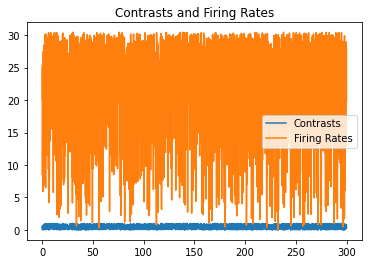

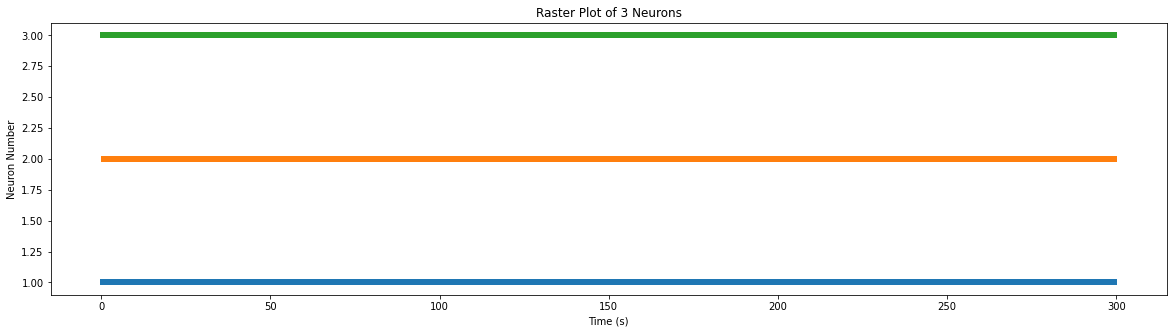

In [62]:
# Plot Inputs - Contrasts and Firing Rates

plt.plot(timestamps, contrasts)
plt.plot(timestamps, firing_rates)
plt.legend(["Contrasts", "Firing Rates"])
plt.title("Contrasts and Firing Rates")
plt.show()

# Plot Output Spikes

plt.figure(figsize=(20,5))
for i in range(3):
    raster_plot(timestamps,spikes[i],pos=i)
    
plt.ylabel("Neuron Number")
plt.xlabel("Time (s)")
plt.title("Raster Plot of 3 Neurons")
plt.show()
    

In [ ]:
# Other Junk

# def michelson_contrast(frames):
#     output = np.zeros(len(frames))
#     for i in range(len(frames)):
#         I_max = np.max(frames[i])
#         I_min = np.min(frames[i])
#         output[i] = (I_max - I_min)/(I_max + I_min)
#     print(np.shape(output))
#     print(output)
#     return output